In [1]:
#BEN STARTS

import bs4
from bs4 import BeautifulSoup
import requests
import datetime


titles=[]
dates=[]
urls=[]
summaries=[]

#Loop through every page of conviction notices by CIABOC to extract the title, date, url, and summary
#We don't know exactly how many entries we are extracting, so we'll set an arbitrary max of 100 for now and see if we hit that number of entries to loop through
i=1
while i<=100:
    html = "https://www.ciaboc.gov.lk/prosecute/convictions?start="
    response = requests.get(html+str(i))
    txt=response.text
    soup=BeautifulSoup(txt,"html.parser")
    divs=soup.findAll('div',{"class":"entry-info-wrap"})
    for div in divs:
        title=div.h2.text
        titles.append(title)
        date=div.time.text
        dates.append(date)
        url=div.a['href']
        urls.append("https://www.ciaboc.gov.lk"+url)
        summary=div.p.text
        summaries.append(summary)
#Inspecting the HTML, we see each page has 12 lists, so we'll set our counter for the loop to 12
    i=i+12
 
print(titles, dates, urls, summaries)



['\n\n\t\t\t\t\tA Mudliar was convicted for Accepting a Bribe\n', '\n\n\t\t\t\t\tHCB/2146/2016\n', '\n\n\t\t\t\t\tHCB 2040\n', '\n\n\t\t\t\t\tField Labour officer attached to Labour  Office of Badulla convicted for offence of Bribery\n', '\n\n\t\t\t\t\tDivisional Secretary convicted for taking bribes\n', '\n\n\t\t\t\t\tSentenced 14 years rigorous imprisonment to a former Inland Revenue Tax officer\n', '\n\n\t\t\t\t\tHCB 2036/14\n', '\n\n\t\t\t\t\tHCB 23703/1/2013\n', '\n\n\t\t\t\t\tHCB 2142/2016\n', '\n\n\t\t\t\t\tHCB 26/2017\n', '\n\n\t\t\t\t\tPrincipal convicted for accepting a bribe of Rs.40,000/- to admit a child to the school.\n', '\n\n\t\t\t\t\tHCB 2082/15\n', '\n\n\t\t\t\t\tHCB 1929/12\n', '\n\n\t\t\t\t\t HCB 1810/ 2009\n', '\n\n\t\t\t\t\tMC 80708/1/17\n', '\n\n\t\t\t\t\tMC 80954/1/17\n', '\n\n\t\t\t\t\tMC 80707/1/17\n', '\n\n\t\t\t\t\tMC 80710/01/17\n', '\n\n\t\t\t\t\tHCB 1720/07\n', '\n\n\t\t\t\t\tHCB 2120/ 2015\n', '\n\n\t\t\t\t\tHCB 2028/ 2014\n', '\n\n\t\t\t\t\tHCB 1804/ 20

In [2]:
#GREG STARTS

#import to a Pandas dataframe    
import pandas as pd
convictions_df=pd.DataFrame({'title':titles,
                            'date':pd.to_datetime(dates),
                            'url':urls,
                            'summary':summaries})

convictions_df

,date,summary,title,url
0,2018-08-13,Case No B/1928/12,\n\n\t\t\t\t\tA Mudliar was convicted for Acce...,https://www.ciaboc.gov.lk/prosecute/conviction...
1,2018-07-07,"Accused – Rajaranjith, Manager attached to the...",\n\n\t\t\t\t\tHCB/2146/2016\n,https://www.ciaboc.gov.lk/prosecute/conviction...
2,2018-07-07,Open Inquiry - offering of a bribe to a public...,\n\n\t\t\t\t\tHCB 2040\n,https://www.ciaboc.gov.lk/prosecute/conviction...
3,2018-05-30,,\n\n\t\t\t\t\tField Labour officer attached to...,https://www.ciaboc.gov.lk/prosecute/conviction...
4,2018-05-22,,\n\n\t\t\t\t\tDivisional Secretary convicted f...,https://www.ciaboc.gov.lk/prosecute/conviction...
5,2018-05-11,Honourable High court judge sentenced 14 years...,\n\n\t\t\t\t\tSentenced 14 years rigorous impr...,https://www.ciaboc.gov.lk/prosecute/conviction...
6,2018-05-04,,\n\n\t\t\t\t\tHCB 2036/14\n,https://www.ciaboc.gov.lk/prosecute/conviction...
7,2018-04-11,Honourable Magistrate imposed two years rigoro...,\n\n\t\t\t\t\tHCB 23703/1/2013\n,https://www.ciaboc.gov.lk/prosecute/conviction...
8,2018-03-22,Engineering Assistant ordered to pay 1.2Mn as ...,\n\n\t\t\t\t\tHCB 2142/2016\n,https://www.ciaboc.gov.lk/prosecute/conviction...
9,2018-03-20,"Accused was ordered to pay Rs.250,000/-",\n\n\t\t\t\t\tHCB 26/2017\n,https://www.ciaboc.gov.lk/prosecute/conviction...


In [4]:
#Clean the title and date data
convictions_df = convictions_df.replace(r'\n',' ', regex=True) 
convictions_df = convictions_df.replace(r'\t',' ', regex=True) 

convictions_df

,date,summary,title,url
0,2018-08-13,Case No B/1928/12,A Mudliar was convicted for Accepting a...,https://www.ciaboc.gov.lk/prosecute/conviction...
1,2018-07-07,"Accused – Rajaranjith, Manager attached to the...",HCB/2146/2016,https://www.ciaboc.gov.lk/prosecute/conviction...
2,2018-07-07,Open Inquiry - offering of a bribe to a public...,HCB 2040,https://www.ciaboc.gov.lk/prosecute/conviction...
3,2018-05-30,,Field Labour officer attached to Labour...,https://www.ciaboc.gov.lk/prosecute/conviction...
4,2018-05-22,,Divisional Secretary convicted for taki...,https://www.ciaboc.gov.lk/prosecute/conviction...
5,2018-05-11,Honourable High court judge sentenced 14 years...,Sentenced 14 years rigorous imprisonmen...,https://www.ciaboc.gov.lk/prosecute/conviction...
6,2018-05-04,,HCB 2036/14,https://www.ciaboc.gov.lk/prosecute/conviction...
7,2018-04-11,Honourable Magistrate imposed two years rigoro...,HCB 23703/1/2013,https://www.ciaboc.gov.lk/prosecute/conviction...
8,2018-03-22,Engineering Assistant ordered to pay 1.2Mn as ...,HCB 2142/2016,https://www.ciaboc.gov.lk/prosecute/conviction...
9,2018-03-20,"Accused was ordered to pay Rs.250,000/-",HCB 26/2017,https://www.ciaboc.gov.lk/prosecute/conviction...


In [5]:
import datetime

#(2) build a time-series table of convictions per month
convictions_ts_month = pd.DataFrame(convictions_df.set_index('date').resample('MS').size())

convictions_ts_month

,0
date,
2016-01-01,2
2016-02-01,0
2016-03-01,0
2016-04-01,0
2016-05-01,0
2016-06-01,0
2016-07-01,0
2016-08-01,0
2016-09-01,1


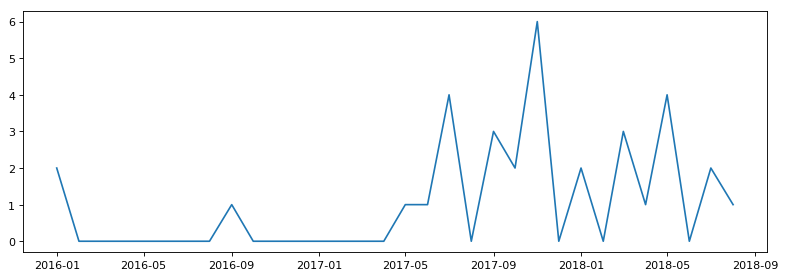

In [6]:
#Graph Timeseries data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Set Plot Size
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

#Draw Plot
plt.plot(convictions_ts_month[0])
plt.show()


In [7]:
#Group data by Month over the three year period
groupedmonths = convictions_ts_month.groupby([convictions_ts_month.index.month], as_index=True).mean()
groupedmonths

,0
date,
1,1.333333
2,0.000000
3,1.000000
4,0.333333
5,1.666667
6,0.333333
7,2.000000
8,0.333333
9,2.000000


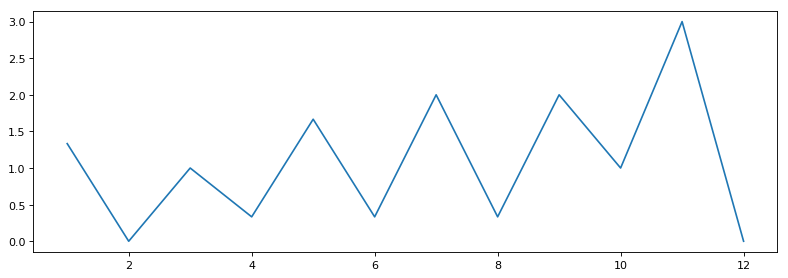

In [10]:
#Graph mean monthly data

#Set Plot Size
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(groupedmonths[0])
plt.show()


In [ ]:
#Group data by Year
convictions_ts_month.groupby([convictions_ts_month.index.year], as_index=True).mean()
